# Load Modules

In [1]:
import numpy  as np
import pandas  as pd
np.random.seed(2019)

%pylab inline
# For retina displays:
# %config InlineBackend.figure_format = 'retina'

Populating the interactive namespace from numpy and matplotlib


This notebook requires the [Keras](https://keras.io/) module. You can install it with the shell command `pip install keras`.

In [2]:
from keras.models     import Sequential
from keras.layers     import Activation
from keras.optimizers import SGD
from keras.layers     import Dense
from keras.utils      import to_categorical
from keras.datasets   import mnist
from keras.metrics    import categorical_accuracy
from keras.callbacks  import EarlyStopping

Using TensorFlow backend.


The module [seaborn](http://seaborn.pydata.org/) is **not** necessary. Just for nicer plots, install it with `pip install seaborn`.

In [3]:
import seaborn as sns
sns.set(style='white', font_scale=1.3, rc={
    'lines.linewidth': 3,
    'axes.grid': True, 'grid.linestyle': ':',
    'axes.spines.left': True,
    'axes.spines.bottom': True,
    'axes.spines.right': True,
    'axes.spines.top': True,
    'axes.edgecolor': '.5',
})

# Load MNIST Dataset

In [4]:
(x_trai, y_trai), (x_test, y_test) = mnist.load_data()

In [5]:
L_trai = len(x_trai)
L_test = len(x_test)

# Reshape the images into vectors of dim 28*28=784
X_trai = x_trai.reshape((L_trai, -1))
X_test = x_test.reshape((L_test, -1))

# Y needs to be converted into a vector with indicators
Y_test = to_categorical(y_test)
Y_trai = to_categorical(y_trai)

print("We have %d samples in the training set"%L_trai)
print("We have %d samples in the test set"%L_test)

We have 60000 samples in the training set
We have 10000 samples in the test set


## Plot some random digits

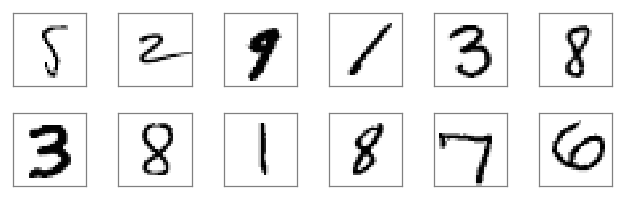

In [6]:
NX, NY = 2, 6
fig, ax = plt.subplots(NX,NY,figsize=(1.5*NY,1.5*NX))
for i in range(NX):
    for j in range(NY):
        img = x_trai[np.random.randint(L_trai)]
        ax[i][j].imshow(img, cmap='Greys');
        ax[i][j].set_xticklabels([]); ax[i][j].set_xticks([])
        ax[i][j].set_yticklabels([]); ax[i][j].set_yticks([])
plt.tight_layout()
#plt.savefig("digits_examples.pdf")

# Shallow Neural Network
Only one hidden layer

In [ ]:
# Define the shallow neural network

stop_rule = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')

model = Sequential()
model.add(Dense(300, input_dim=784, activation="relu"))
model.add(Dense(10))              # 10 is the output dimension
model.add(Activation("softmax"))  # Provides a probabilities for each of 0,..,9
model.compile(loss="categorical_crossentropy", optimizer=SGD(), metrics=[categorical_accuracy] )
history = model.fit(
    X_trai, Y_trai, validation_split=0.2,
    epochs=30, batch_size=512, verbose=1,
    callbacks=[stop_rule],
)

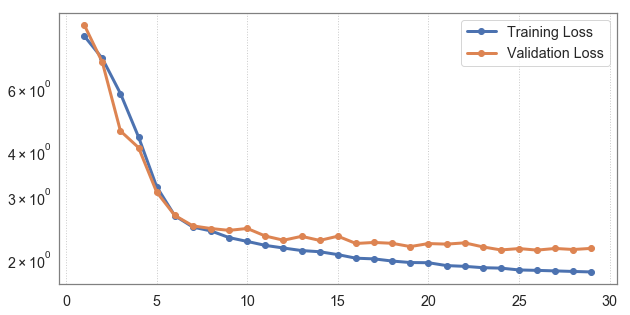

In [8]:
df = pd.DataFrame(history.history).rename({
    'loss':'Training Loss', 'val_loss':'Validation Loss'
},axis=1)

fig, ax1 = plt.subplots(1,1, figsize=(10,5))
df.iloc[1:][['Training Loss', 'Validation Loss']].plot(style='-o', ax=ax1, logy=True);
plt.savefig("training.pdf")

## Out-of-sample predictions

In [9]:
preds = model.predict(X_test)
# The predicted class is the one with the highest prob
preds = np.argmax(preds,axis=1)
reals = np.argmax(Y_test,axis=1)

accuracy_in  = df.iloc[-1]['categorical_accuracy']
accuracy_out = np.mean(preds==reals)
print("In-sample accuracy:     {0:0.2f}% ".format(accuracy_in*100))
print("Out-of-sample accuracy: {0:0.2f}%".format(accuracy_out*100))

In-sample accuracy:     88.45% 
Out-of-sample accuracy: 86.96%


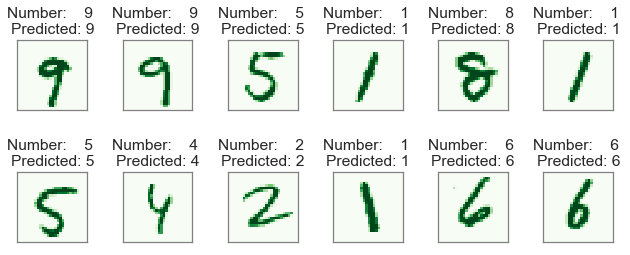

In [10]:
NX, NY = 2, 6
fig, ax = plt.subplots(NX,NY,figsize=(1.5*NY,2*NX))
for i in range(NX):
    for j in range(NY):
        s = np.random.randint(len(preds))
        img = x_test[s]
        colors = 'Greens' if reals[s]==preds[s] else 'Reds'
        ax[i][j].imshow(img, cmap=colors)
        ax[i][j].set_title("Number:    %d \nPredicted: %d"%(reals[s], preds[s]))
        ax[i][j].set_xticklabels([]); ax[i][j].set_xticks([])
        ax[i][j].set_yticklabels([]); ax[i][j].set_yticks([])
plt.tight_layout()
#plt.savefig("digits_preds_examples.pdf")

# Go Deeper
4 hidden layers

In [ ]:
stop_rule = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')

# Define the neural network
deep_model = Sequential()
deep_model.add(Dense(300, input_dim=784, activation="relu"))
deep_model.add(Dense(150, activation="relu"))
deep_model.add(Dense(100, activation="relu"))
deep_model.add(Dense(50 , activation="relu"))
deep_model.add(Dense(10))              # 10 is the output dimension
deep_model.add(Activation("softmax"))  # Provides a probabilities for each of 0,..,9
deep_model.compile(loss="categorical_crossentropy", optimizer=SGD(), metrics=[categorical_accuracy] )

history = deep_model.fit(
    X_trai, Y_trai, validation_split=0.2,
    epochs=30, batch_size=512, verbose=1,
    callbacks=[stop_rule],
)

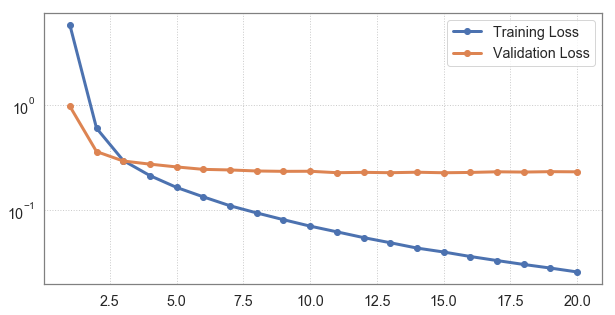

In [12]:
df = pd.DataFrame(history.history).rename({
    'loss':'Training Loss', 'val_loss':'Validation Loss'
},axis=1)
df.index = df.index + 1
fig, ax1 = plt.subplots(1,1, figsize=(10,5))
df[['Training Loss', 'Validation Loss']].plot(style='-o', ax=ax1, logy=True);
#plt.savefig("training.pdf")

## Out-of-sample predictions

In [13]:
preds = deep_model.predict(X_test)
# The predicted class is the one with the highest prob
preds = np.argmax(preds,axis=1)
reals = np.argmax(Y_test,axis=1)

accuracy_in  = df.iloc[-1]['categorical_accuracy']
accuracy_out = np.mean(preds==reals)
print("In-sample accuracy:     {0:0.2f}% ".format(accuracy_in*100))
print("Out-of-sample accuracy: {0:0.2f}%".format(accuracy_out*100))

In-sample accuracy:     99.58% 
Out-of-sample accuracy: 94.51%


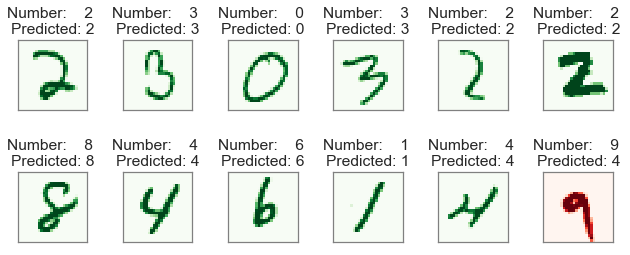

In [14]:
NX, NY = 2, 6
fig, ax = plt.subplots(NX,NY,figsize=(1.5*NY,2*NX))
for i in range(NX):
    for j in range(NY):
        s = np.random.randint(len(preds))
        img = x_test[s]
        colors = 'Greens' if reals[s]==preds[s] else 'Reds'
        ax[i][j].imshow(img, cmap=colors)
        ax[i][j].set_title("Number:    %d \nPredicted: %d"%(reals[s], preds[s]))
        ax[i][j].set_xticklabels([]); ax[i][j].set_xticks([])
        ax[i][j].set_yticklabels([]); ax[i][j].set_yticks([])
plt.tight_layout()
#plt.savefig("digits_preds_examples.pdf")

# Plots for Lesson Slides

## Digits

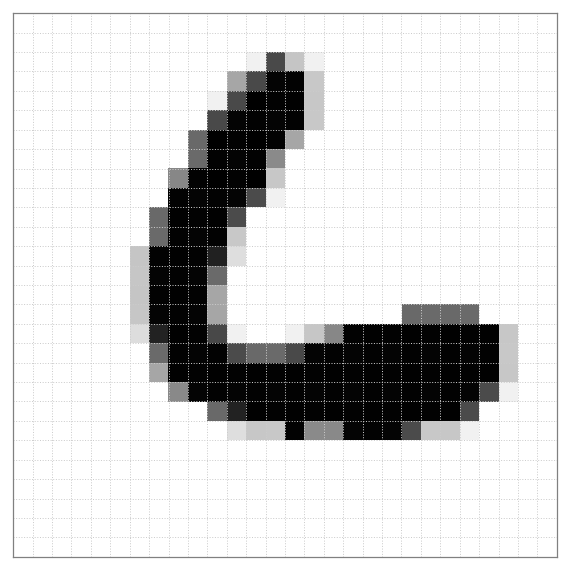

In [15]:
fig, ax1 = plt.subplots(1,1,figsize=(10,10))
img = x_trai[np.random.randint(L_trai)]
ax1.imshow(img, cmap='Greys');
ax1.set_xticks([x+0.5 for x in range(28)])
ax1.set_yticks([x+0.5 for x in range(28)])
ax1.set_xticklabels([]); 
ax1.set_yticklabels([]); 
ax1.grid(True);
plt.savefig("one_digit.png");

## Transformations

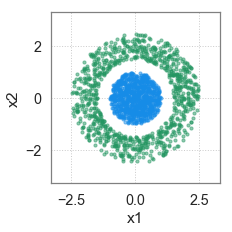

In [16]:
N   = 10**3
TH1 = 1.0
TH2 = 1.5
TH3 = 2.5

px  = list(np.random.uniform(-3,3,N))
px.extend(np.random.randn(2*N))
py  = list(np.random.uniform(-3,3,N))
py.extend(np.random.randn(2*N))

df  = pd.DataFrame({'x1':px,'x2':py})
df['r'] = np.sqrt(df['x1']**2 + df['x2']**2)
df['y'] = np.where(df['r']>TH2,1,0)
df = df[ (df['r']<TH1) | (df['r']>TH2) ]
df = df[df['r']<TH3]

fig, ax1 = plt.subplots(1,1, figsize=(3.5,3.5))
df[df['y']==0].plot.scatter(x='x1',y='x2', color='#168CE7', ax=ax1, s=10, alpha=0.5);
df[df['y']==1].plot.scatter(x='x1',y='x2', color='#249662', ax=ax1, s=10, alpha=0.5);
ax1.set_xlim([-3.3,3.3])
ax1.set_ylim([-3.3,3.3]);
plt.tight_layout()
plt.savefig("cartesian.pdf")

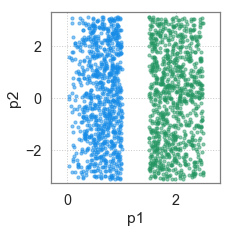

In [17]:
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return pd.Series([rho, phi])

df['p1'] = np.NaN; df['p2'] = np.NaN

df[['p1','p2']] = df.apply(lambda x : cart2pol(x['x1'], x['x2']), axis=1)

fig, ax1 = plt.subplots(1,1, figsize=(3.5,3.5))
df[df['y']==0].plot.scatter(x='p1',y='p2', color='#168CE7', ax=ax1, s=10, alpha=0.5);
df[df['y']==1].plot.scatter(x='p1',y='p2', color='#249662', ax=ax1, s=10, alpha=0.5);
ax1.set_xlim([   -0.3,2.8])
ax1.set_ylim([-3.3,3.3]);
plt.tight_layout()
plt.savefig("polar.pdf")

## Activation Functions

In [18]:
# Sigmoid
f1 = lambda x : 1 / (1 + np.exp(-x))

# ReLu
f2 = lambda x : np.maximum(0, x)
    
# tanh
f3 = lambda x : np.tanh(x)

# Softmax
f4 = lambda X : [np.exp(x) / (np.sum(np.exp(X))) for x in X]

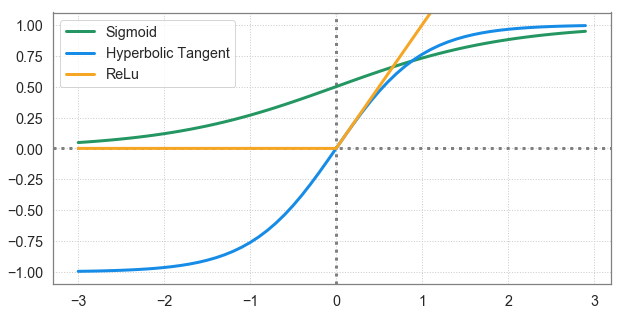

In [20]:
X = np.arange(-3,3,0.1)
colors = ['#249662', '#168CE7', '#F6A623']
names = ['Sigmoid', 'Hyperbolic Tangent', 'ReLu']

df = pd.DataFrame(index=X)
for name,f in zip(names , [f1,f3,f2]):
    df[name] = list(map(f,X))

fig, ax1 = plt.subplots(1,1, figsize=(10,5))
ax1.axvline(0, color='gray', linestyle=':'); 
ax1.axhline(0, color='gray', linestyle=':'); 
df.plot(ax=ax1, color=colors);
ax1.set_ylim([-1.1,1.1]);
plt.savefig("all_activations.pdf");

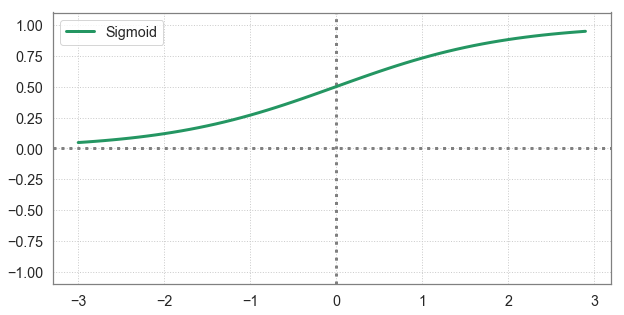

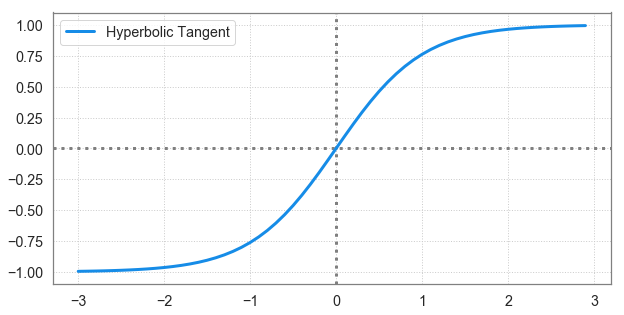

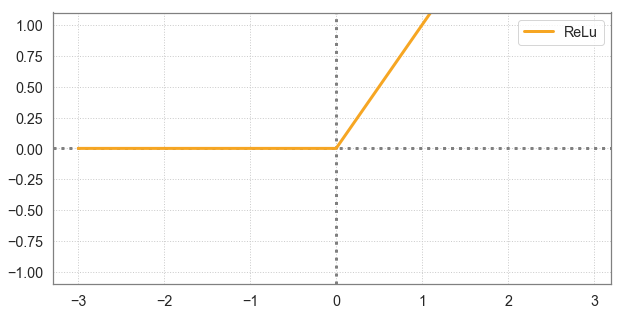

In [21]:
for col, name in zip(colors, names):
    fig, ax1 = plt.subplots(1,1, figsize=(10,5))
    ax1.axhline(0,color='gray', linestyle=':'); ax1.axvline(0,color='gray', linestyle=':');
    df[[name]].plot(ax=ax1, color=col);
    ax1.set_ylim([-1.1,1.1])
    plt.savefig(name+".pdf");

<br/>